# Assignment 4

I did it on my own Jupyter Anaconda notebook, mostly because the Coursera one does not suport a lot of libraries. 

My instructions were the following:

"State the region and the domain category that your data sets are about (e.g., Ann Arbor, Michigan, United States and economic activity or measures).
You must state a question about the domain category and region that you identified as being interesting.
You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.
What do we mean by economic activity or measures? For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions."

## What was my question?

I decided to ask the following: did the Ann Arbor county, when compared to the State of Michigan and the whole United States, performed better about its unemployment rates during the COVID-19 pandemic emergency?

The question considers the COVID-19 pandemic emergency, in this timelapse, between January 2020 and April 2021 (last month where data about the three regions compared was available). 

## References

I used the following CSV data:
https://fred.stlouisfed.org/series/ANNA426URN (for the Ann Arbor County, Michigan);
https://fred.stlouisfed.org/series/MIUR (for the State of Michigan);
https://fred.stlouisfed.org/series/UNRATE (for the United States as whole).

In [107]:
#As I did know how many libraries I would need, I imported all the following. Most of them were used.

import pandas as pd
import numpy as np
import urllib
import requests
import io
import lxml
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Extracting data about unemployment in the State of Michigan (dec. 2019 - apr. 2021)

In [53]:
miur = pd.read_csv('MIUR.csv').dropna()
#setting the table to only get time from december 2019 onwards
#considering the number of months since the beginning of COVID-19 pandemic
#until the last data introduced, at april 2021
miur = miur.tail(17)
miur

,DATE,MIUR
527,2019-12-01,3.7
528,2020-01-01,3.7
529,2020-02-01,3.7
530,2020-03-01,3.7
531,2020-04-01,23.6
532,2020-05-01,20.8
533,2020-06-01,14.1
534,2020-07-01,9.0
535,2020-08-01,8.5
536,2020-09-01,8.2


### Extracting data about unemployment in Ann Arbor County (dec. 2019 - apr. 2021)

In [55]:
unlocal = pd.read_csv('ANNA426URN.csv').dropna()
#setting the table to only get time from december 2019 onwards
#considering the number of months since the beginning of COVID-19 pandemic
#until the last data introduced, at april 2021
unlocal = unlocal.tail(17)
unlocal

,DATE,ANNA426URN
359,2019-12-01,1.9
360,2020-01-01,2.3
361,2020-02-01,2.2
362,2020-03-01,2.7
363,2020-04-01,14.8
364,2020-05-01,13.7
365,2020-06-01,9.2
366,2020-07-01,7.1
367,2020-08-01,5.8
368,2020-09-01,5.3


### Extracting data about unemployment rate in the U.S. (jan. 2020 - apr. 2021)

In [106]:
unrate = pd.read_csv('UNRATE.csv').dropna()
#setting the table to only get time from december 2019 onwards
#considering the number of months since the beginning of COVID-19 pandemic
#until the last data introduced, at april 2021
unrate = unrate.tail(17)
unrate

,DATE,UNRATE
864,2020-01-01,3.5
865,2020-02-01,3.5
866,2020-03-01,4.4
867,2020-04-01,14.8
868,2020-05-01,13.3
869,2020-06-01,11.1
870,2020-07-01,10.2
871,2020-08-01,8.4
872,2020-09-01,7.8
873,2020-10-01,6.9


Note that the head and tail of all the data when compared will be limited by the last 16 months (jan. 2020 - apr. 2021) due to the following limits: the size of 17 months, common to all .csv files; and the availability of data (limited to apr. 2021 on both State of Michigan and Ann Arbor's unemployment rate tables.

<IPython.core.display.Javascript object>


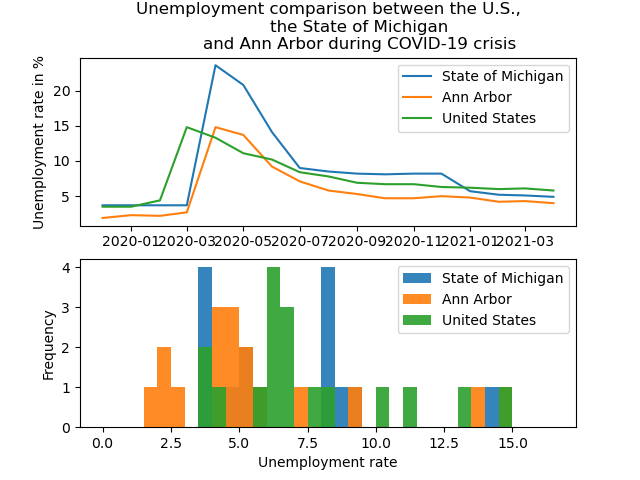

In [94]:
get_ipython().magic('matplotlib notebook')
plt.figure()
plt.subplot(2, 1, 1)

observation_dates = list(map(pd.to_datetime, miur['DATE']))
plt.plot(observation_dates, miur['MIUR'])
plt.plot(observation_dates, unlocal['ANNA426URN'])
plt.plot(observation_dates, unrate['UNRATE'])

In [95]:
#plt.xlabel("Date")
plt.ylabel("Unemployment rate in %")
plt.legend(["State of Michigan", "Ann Arbor", "United States"])
plt.title("""Unemployment comparison between the U.S.,
            the State of Michigan
            and Ann Arbor during COVID-19 crisis""")

Text(0.5, 1.0, 'Unemployment comparison between the U.S.,\n            the State of Michigan\n            and Ann Arbor during COVID-19 crisis')

In [96]:
plt.subplot(2, 1, 2)

plt.hist(miur['MIUR'], alpha=0.9, bins=np.arange(0,17,0.5), label='State of Michigan');
plt.hist(unlocal['ANNA426URN'], alpha=0.9, bins=np.arange(0,17,0.5), label='Ann Arbor');
plt.hist(unrate['UNRATE'], alpha=0.9, bins=np.arange(0, 17,0.5), label='United States')
plt.legend();

plt.gca().set_ylabel('Frequency')
plt.gca().set_xlabel('Unemployment rate')

Text(0.5, 0, 'Unemployment rate')

In [103]:
statsmian = stats.ttest_ind(miur['MIUR'],unlocal['ANNA426URN'])
statsusan = stats.ttest_ind(unrate['UNRATE'],unlocal['ANNA426URN'])
statsmius = stats.ttest_ind(miur['MIUR'], unrate['UNRATE'])
print(statsmian, statsusan, statsmius)
### We can state that the average rate of unemployment of Ann Arbor, when compared with Michigan and the whole United States

#is structurally lower with a 
# 95% confidence level.

Ttest_indResult(statistic=1.6724633820577, pvalue=0.1041840686438419) Ttest_indResult(statistic=1.541983251778091, pvalue=0.13290986916533004) Ttest_indResult(statistic=0.6087531434783167, pvalue=0.546985574984031)


About the unemployment rates during the COVID-19 emergency (from its beginning until april 2021), we can state the following, considering the statistical values, with a 95% confidence level:
i. The Ann Arbor county had, on average, a lower rate of unemployment when compared with the State of Michigan;
ii. The Ann Arbor county also had, on average, a lower rate of unemployment when compared with the United States.
iii. Considering the high p-value of 0.54698, the State of Michigan had a higher rate of unemployment when compared with the United States.

The sparkline chart and the histogram also points the same as the statistical tests. More specifically, considering the null hypothesis as not rejected about Michigan performing better than U.S. on average unemployment rate during COVID-19 emergency, the charts also points that the State of Michigan only begun to have a lower unemployment rate than the whole country from January 2021 onwards.